Node Count: 2
Avg SPS: 98.63432351258804
Avg Direct: 79.0
SPS Std: 1.362992040022419
Direct Std: 0.0
Avg SPS Msgs: 0.3008172264901915
Avg Direct Msgs: 1.0
SPS Msgs Std: 0.03245219142910522
Direct Msgs Std: 0.0

Node Count: 3
Avg SPS: 112.5703427831316
Avg Direct: 141.89476200941084
SPS Std: 2.329289150080175
Direct Std: 25.952436734620616
Avg SPS Msgs: 0.6326272091221804
Avg Direct Msgs: 1.7961362279672257
SPS Msgs Std: 0.0554592654780994
Direct Msgs Std: 0.3285118574002609

Node Count: 4
Avg SPS: 126.17866633624324
Avg Direct: 189.18412606381017
SPS Std: 2.701764560493746
Direct Std: 20.887698014054806
Avg SPS Msgs: 0.9566349127676962
Avg Direct Msgs: 2.394735772959622
SPS Msgs Std: 0.0643277276308035
Direct Msgs Std: 0.2644012406842381

Node Count: 5
Avg SPS: 138.02759129116072
Avg Direct: 225.4471606964453
SPS Std: 3.4046577874481976
Direct Std: 13.183332579703302
Avg SPS Msgs: 1.2387521735990643
Avg Direct Msgs: 2.8537615278031057
SPS Msgs Std: 0.0810632806535285
Direct Msgs Std: 0

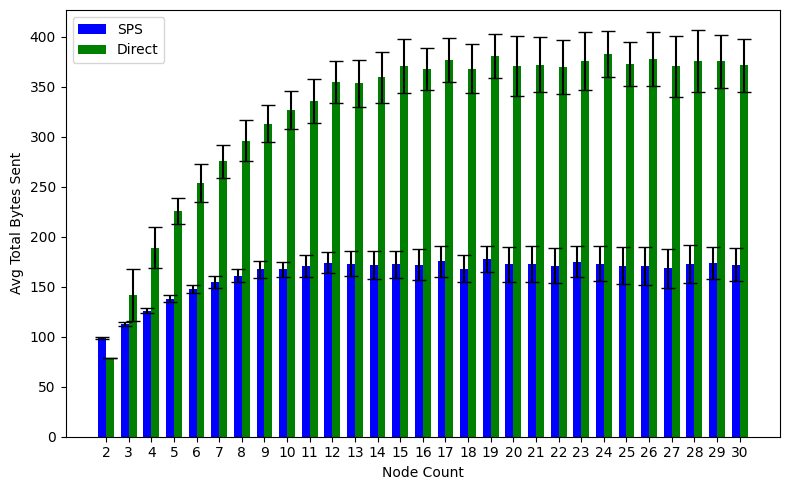

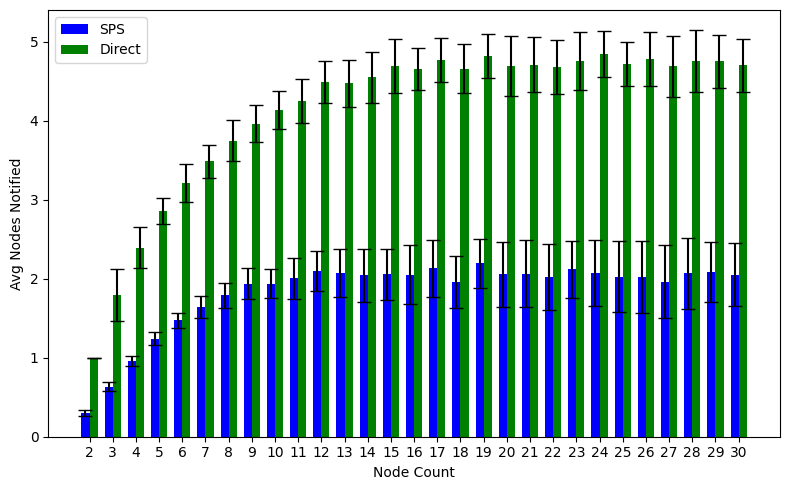

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the results from the JSON file
with open('../results/dissemination/results-fixed-density-low.json', 'r') as f:
    data = json.load(f)

# Prepare the data
node_counts = []  # Node counts
avg_sps = []  # SPS avgTotal bytes
avg_direct = []  # Direct avgTotal bytes
std_sps = []  # Standard deviation for SPS
std_direct = []  # Standard deviation for Direct

avg_sps_msgs = []  # SPS message count
avg_direct_msgs = []  # Direct message count
std_sps_msgs = []  # Standard deviation for SPS messages
std_direct_msgs = []  # Standard deviation for Direct messages

all_sps_msgs_y = []
all_sps_msg_x = []

# Extract the data
for node_count_str, simulations in data.items():
    node_count = int(node_count_str)
    node_counts.append(node_count)
    
    # Get avgTotal and standard deviation for SPS and Direct
    sps_totals = [run['net']['sps']['avgTotal'] for run in simulations]
    direct_totals = [run['net']['direct']['avgTotal'] for run in simulations]
    
    avg_sps.append(np.mean(sps_totals))
    avg_direct.append(np.mean(direct_totals))
    
    std_sps.append(np.std(sps_totals))
    std_direct.append(np.std(direct_totals))

    # Get message counts and standard deviation for SPS and Direct
    sps_msgs = [run['messages']['sps'] for run in simulations]
    direct_msgs = [run['messages']['direct'] for run in simulations]

    all_sps_msgs_y.extend(sps_msgs)
    all_sps_msg_x.extend([node_count] * len(sps_msgs))
    
    avg_sps_msgs.append(np.mean(sps_msgs))
    avg_direct_msgs.append(np.mean(direct_msgs))
    
    std_sps_msgs.append(np.std(sps_msgs))
    std_direct_msgs.append(np.std(direct_msgs))

    print(f'Node Count: {node_count}')
    print(f'Avg SPS: {avg_sps[-1]}')
    print(f'Avg Direct: {avg_direct[-1]}')
    print(f'SPS Std: {std_sps[-1]}')
    print(f'Direct Std: {std_direct[-1]}')
    print(f'Avg SPS Msgs: {avg_sps_msgs[-1]}')
    print(f'Avg Direct Msgs: {avg_direct_msgs[-1]}')
    print(f'SPS Msgs Std: {std_sps_msgs[-1]}')
    print(f'Direct Msgs Std: {std_direct_msgs[-1]}')
    print()

# Convert lists to numpy arrays for easy plotting
node_counts = np.array(node_counts)
avg_sps = np.array(avg_sps)
avg_direct = np.array(avg_direct)
std_sps = np.array(std_sps)
std_direct = np.array(std_direct)

avg_sps_msgs = np.array(avg_sps_msgs)
avg_direct_msgs = np.array(avg_direct_msgs)
std_sps_msgs = np.array(std_sps_msgs)
std_direct_msgs = np.array(std_direct_msgs)

# Plotting
bar_width = 0.35  # Width of the bars
index = np.arange(len(node_counts))  # Node count index

# Create bars for SPS and Direct with error bars
plt.figure(figsize=(8, 5))
plt.bar(index, avg_sps, bar_width, yerr=std_sps, capsize=5, label='SPS', color='b')
plt.bar(index + bar_width, avg_direct, bar_width, yerr=std_direct, capsize=5, label='Direct', color='g')

# Add labels, title, and legend
plt.xlabel('Node Count')
plt.ylabel('Avg Total Bytes Sent')
# plt.title('Avg Total Bytes Sent per Block Break for Varying Node Counts')
plt.xticks(index + bar_width / 2, node_counts)  # Properly position x-axis labels
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Second plot: Message counts
plt.figure(figsize=(8, 5))
plt.bar(index, avg_sps_msgs, bar_width, yerr=std_sps_msgs, capsize=5, label='SPS', color='b')
plt.bar(index + bar_width, avg_direct_msgs, bar_width, yerr=std_direct_msgs, capsize=5, label='Direct', color='g')

# Add labels, title, and legend for the message counts
plt.xlabel('Node Count')
plt.ylabel('Avg Nodes Notified')
# plt.title('Avg Nodes Notified per Block Break for Varying Node Counts')
plt.xticks(index + bar_width / 2, node_counts)  # Properly position x-axis labels
plt.legend()

# Display the second plot
plt.tight_layout()
plt.show()